In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv("/content/Customers.csv")

In [5]:
products =  pd.read_csv('/content/Products (2).csv')

In [6]:
transactions =  pd.read_csv('/content/Transactions.csv')

In [7]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

In [8]:
customer_agg = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [9]:
customer_data = pd.merge(customers, customer_agg, on='CustomerID')

In [10]:
features = customer_data[['TotalValue', 'Quantity']]

In [11]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

In [13]:
db_index = davies_bouldin_score(features_scaled, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.776661054409607


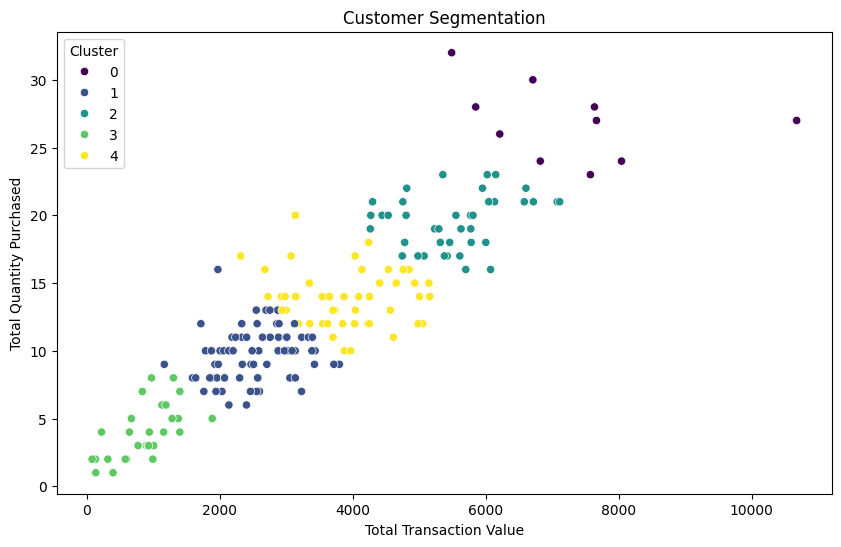

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Transaction Value')
plt.ylabel('Total Quantity Purchased')
plt.show()

In [15]:
customer_data.to_csv('FirstName_LastName_Clustering.csv', index=False)